In [14]:
import nltk
nltk.download('punkt')
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
# import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
!pip install jupyterthemes
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:


df_fake = pd.read_csv('/content/Fake_news.csv')


df_fake.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [16]:

df_true = pd.read_csv("/content/True_news.csv")

df_true.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’s...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian C...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke ...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name ...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Duri...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [17]:
df_true.shape

(5996, 4)

In [18]:
df_fake.shape

(5996, 4)

In [19]:
df_true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [20]:
df_fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [21]:
df_true['isfake'] = 0
df_true.head()

,title,text,subject,date,isfake
0,Donald Trump Sends Out Embarrassing New Year’s...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian C...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke ...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name ...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Duri...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [22]:
 df_fake['isfake'] = 1
df_fake.head()

,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [23]:
df = pd.concat([df_true, df_fake]).reset_index(drop = True)
df

,title,text,subject,date,isfake
0,Donald Trump Sends Out Embarrassing New Year’s...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian C...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke ...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name ...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Duri...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
11987,"ICRC, jurists join rebuke of Trump torture rem...",GENEVA (Reuters) - The International Committee...,politicsNews,"January 26, 2017",1
11988,Trump's plan to halt 'catch and release' of mi...,"GUADALUPE, Mexico/TORNILLO, Texas (Reuters) - ...",politicsNews,"January 26, 2017",1
11989,Trump wants border tax to pay for wall with Me...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"January 26, 2017",1
11990,Trump names temporary chairs for U.S. labor ag...,(Reuters) - U.S. President Donald Trump has ap...,politicsNews,"January 26, 2017",1


In [24]:
df.drop(columns = ['date'],inplace = True)

In [25]:
#combine title and text together

df['original'] = df['title'] + ' ' + df['text']
df.head()

,title,text,subject,isfake,original
0,Donald Trump Sends Out Embarrassing New Year’s...,Donald Trump just couldn t wish all Americans ...,News,0,Donald Trump Sends Out Embarrassing New Year’s...
1,Drunk Bragging Trump Staffer Started Russian C...,House Intelligence Committee Chairman Devin Nu...,News,0,Drunk Bragging Trump Staffer Started Russian C...
2,Sheriff David Clarke Becomes An Internet Joke ...,"On Friday, it was revealed that former Milwauk...",News,0,Sheriff David Clarke Becomes An Internet Joke ...
3,Trump Is So Obsessed He Even Has Obama’s Name ...,"On Christmas day, Donald Trump announced that ...",News,0,Trump Is So Obsessed He Even Has Obama’s Name ...
4,Pope Francis Just Called Out Donald Trump Duri...,Pope Francis used his annual Christmas Day mes...,News,0,Pope Francis Just Called Out Donald Trump Duri...


In [26]:
df.original[0]

'Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this d

In [27]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
# obtain additional stopwords from nltk
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from','subject','re','edu','use'])

In [29]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
# Removed stopwords and removed words with 2 or less characters

def preprocess(text):
  result = []
  for token in gensim.utils.simple_preprocess(text):
    if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
      result.append(token)

  return result

In [31]:
df['clean'] = df['original'].apply(preprocess)

In [32]:
df

,title,text,subject,isfake,original,clean
0,Donald Trump Sends Out Embarrassing New Year’s...,Donald Trump just couldn t wish all Americans ...,News,0,Donald Trump Sends Out Embarrassing New Year’s...,"[donald, trump, sends, embarrassing, year, mes..."
1,Drunk Bragging Trump Staffer Started Russian C...,House Intelligence Committee Chairman Devin Nu...,News,0,Drunk Bragging Trump Staffer Started Russian C...,"[drunk, bragging, trump, staffer, started, rus..."
2,Sheriff David Clarke Becomes An Internet Joke ...,"On Friday, it was revealed that former Milwauk...",News,0,Sheriff David Clarke Becomes An Internet Joke ...,"[sheriff, david, clarke, internet, joke, threa..."
3,Trump Is So Obsessed He Even Has Obama’s Name ...,"On Christmas day, Donald Trump announced that ...",News,0,Trump Is So Obsessed He Even Has Obama’s Name ...,"[trump, obsessed, obama, coded, website, image..."
4,Pope Francis Just Called Out Donald Trump Duri...,Pope Francis used his annual Christmas Day mes...,News,0,Pope Francis Just Called Out Donald Trump Duri...,"[pope, francis, called, donald, trump, christm..."
...,...,...,...,...,...,...
11987,"ICRC, jurists join rebuke of Trump torture rem...",GENEVA (Reuters) - The International Committee...,politicsNews,1,"ICRC, jurists join rebuke of Trump torture rem...","[icrc, jurists, join, rebuke, trump, torture, ..."
11988,Trump's plan to halt 'catch and release' of mi...,"GUADALUPE, Mexico/TORNILLO, Texas (Reuters) - ...",politicsNews,1,Trump's plan to halt 'catch and release' of mi...,"[trump, plan, halt, catch, release, migrants, ..."
11989,Trump wants border tax to pay for wall with Me...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,1,Trump wants border tax to pay for wall with Me...,"[trump, wants, border, wall, mexico, white, ho..."
11990,Trump names temporary chairs for U.S. labor ag...,(Reuters) - U.S. President Donald Trump has ap...,politicsNews,1,Trump names temporary chairs for U.S. labor ag...,"[trump, names, temporary, chairs, labor, agenc..."


In [33]:
df['clean'][0]

['donald',
 'trump',
 'sends',
 'embarrassing',
 'year',
 'message',
 'disturbing',
 'donald',
 'trump',
 'wish',
 'americans',
 'happy',
 'year',
 'leave',
 'instead',
 'shout',
 'enemies',
 'haters',
 'dishonest',
 'fake',
 'news',
 'media',
 'reality',
 'star',
 'country',
 'rapidly',
 'grows',
 'stronger',
 'smarter',
 'want',
 'wish',
 'friends',
 'supporters',
 'enemies',
 'haters',
 'dishonest',
 'fake',
 'news',
 'media',
 'happy',
 'healthy',
 'year',
 'president',
 'angry',
 'pants',
 'tweeted',
 'great',
 'year',
 'america',
 'country',
 'rapidly',
 'grows',
 'stronger',
 'smarter',
 'want',
 'wish',
 'friends',
 'supporters',
 'enemies',
 'haters',
 'dishonest',
 'fake',
 'news',
 'media',
 'happy',
 'healthy',
 'year',
 'great',
 'year',
 'america',
 'donald',
 'trump',
 'realdonaldtrump',
 'december',
 'trump',
 'tweet',
 'went',
 'welll',
 'expect',
 'kind',
 'president',
 'sends',
 'year',
 'greeting',
 'like',
 'despicable',
 'petty',
 'infantile',
 'gibberish',
 'trum

In [34]:
# obtain the total words present in the dataset

list_of_words = []
for i in df.clean:
  for j in i:
    list_of_words.append(j)

In [35]:
list_of_words

['donald',
 'trump',
 'sends',
 'embarrassing',
 'year',
 'message',
 'disturbing',
 'donald',
 'trump',
 'wish',
 'americans',
 'happy',
 'year',
 'leave',
 'instead',
 'shout',
 'enemies',
 'haters',
 'dishonest',
 'fake',
 'news',
 'media',
 'reality',
 'star',
 'country',
 'rapidly',
 'grows',
 'stronger',
 'smarter',
 'want',
 'wish',
 'friends',
 'supporters',
 'enemies',
 'haters',
 'dishonest',
 'fake',
 'news',
 'media',
 'happy',
 'healthy',
 'year',
 'president',
 'angry',
 'pants',
 'tweeted',
 'great',
 'year',
 'america',
 'country',
 'rapidly',
 'grows',
 'stronger',
 'smarter',
 'want',
 'wish',
 'friends',
 'supporters',
 'enemies',
 'haters',
 'dishonest',
 'fake',
 'news',
 'media',
 'happy',
 'healthy',
 'year',
 'great',
 'year',
 'america',
 'donald',
 'trump',
 'realdonaldtrump',
 'december',
 'trump',
 'tweet',
 'went',
 'welll',
 'expect',
 'kind',
 'president',
 'sends',
 'year',
 'greeting',
 'like',
 'despicable',
 'petty',
 'infantile',
 'gibberish',
 'trum

In [36]:
len(list_of_words)

2493287

In [37]:
total_words = len(list(set(list_of_words)))
total_words

56567

In [38]:
df['clean_joined'] = df['clean'].apply(lambda x: " ".join(x))
df

,title,text,subject,isfake,original,clean,clean_joined
0,Donald Trump Sends Out Embarrassing New Year’s...,Donald Trump just couldn t wish all Americans ...,News,0,Donald Trump Sends Out Embarrassing New Year’s...,"[donald, trump, sends, embarrassing, year, mes...",donald trump sends embarrassing year message d...
1,Drunk Bragging Trump Staffer Started Russian C...,House Intelligence Committee Chairman Devin Nu...,News,0,Drunk Bragging Trump Staffer Started Russian C...,"[drunk, bragging, trump, staffer, started, rus...",drunk bragging trump staffer started russian c...
2,Sheriff David Clarke Becomes An Internet Joke ...,"On Friday, it was revealed that former Milwauk...",News,0,Sheriff David Clarke Becomes An Internet Joke ...,"[sheriff, david, clarke, internet, joke, threa...",sheriff david clarke internet joke threatening...
3,Trump Is So Obsessed He Even Has Obama’s Name ...,"On Christmas day, Donald Trump announced that ...",News,0,Trump Is So Obsessed He Even Has Obama’s Name ...,"[trump, obsessed, obama, coded, website, image...",trump obsessed obama coded website images chri...
4,Pope Francis Just Called Out Donald Trump Duri...,Pope Francis used his annual Christmas Day mes...,News,0,Pope Francis Just Called Out Donald Trump Duri...,"[pope, francis, called, donald, trump, christm...",pope francis called donald trump christmas spe...
...,...,...,...,...,...,...,...
11987,"ICRC, jurists join rebuke of Trump torture rem...",GENEVA (Reuters) - The International Committee...,politicsNews,1,"ICRC, jurists join rebuke of Trump torture rem...","[icrc, jurists, join, rebuke, trump, torture, ...",icrc jurists join rebuke trump torture remarks...
11988,Trump's plan to halt 'catch and release' of mi...,"GUADALUPE, Mexico/TORNILLO, Texas (Reuters) - ...",politicsNews,1,Trump's plan to halt 'catch and release' of mi...,"[trump, plan, halt, catch, release, migrants, ...",trump plan halt catch release migrants wall gu...
11989,Trump wants border tax to pay for wall with Me...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,1,Trump wants border tax to pay for wall with Me...,"[trump, wants, border, wall, mexico, white, ho...",trump wants border wall mexico white house was...
11990,Trump names temporary chairs for U.S. labor ag...,(Reuters) - U.S. President Donald Trump has ap...,politicsNews,1,Trump names temporary chairs for U.S. labor ag...,"[trump, names, temporary, chairs, labor, agenc...",trump names temporary chairs labor agencies re...


In [39]:
df

,title,text,subject,isfake,original,clean,clean_joined
0,Donald Trump Sends Out Embarrassing New Year’s...,Donald Trump just couldn t wish all Americans ...,News,0,Donald Trump Sends Out Embarrassing New Year’s...,"[donald, trump, sends, embarrassing, year, mes...",donald trump sends embarrassing year message d...
1,Drunk Bragging Trump Staffer Started Russian C...,House Intelligence Committee Chairman Devin Nu...,News,0,Drunk Bragging Trump Staffer Started Russian C...,"[drunk, bragging, trump, staffer, started, rus...",drunk bragging trump staffer started russian c...
2,Sheriff David Clarke Becomes An Internet Joke ...,"On Friday, it was revealed that former Milwauk...",News,0,Sheriff David Clarke Becomes An Internet Joke ...,"[sheriff, david, clarke, internet, joke, threa...",sheriff david clarke internet joke threatening...
3,Trump Is So Obsessed He Even Has Obama’s Name ...,"On Christmas day, Donald Trump announced that ...",News,0,Trump Is So Obsessed He Even Has Obama’s Name ...,"[trump, obsessed, obama, coded, website, image...",trump obsessed obama coded website images chri...
4,Pope Francis Just Called Out Donald Trump Duri...,Pope Francis used his annual Christmas Day mes...,News,0,Pope Francis Just Called Out Donald Trump Duri...,"[pope, francis, called, donald, trump, christm...",pope francis called donald trump christmas spe...
...,...,...,...,...,...,...,...
11987,"ICRC, jurists join rebuke of Trump torture rem...",GENEVA (Reuters) - The International Committee...,politicsNews,1,"ICRC, jurists join rebuke of Trump torture rem...","[icrc, jurists, join, rebuke, trump, torture, ...",icrc jurists join rebuke trump torture remarks...
11988,Trump's plan to halt 'catch and release' of mi...,"GUADALUPE, Mexico/TORNILLO, Texas (Reuters) - ...",politicsNews,1,Trump's plan to halt 'catch and release' of mi...,"[trump, plan, halt, catch, release, migrants, ...",trump plan halt catch release migrants wall gu...
11989,Trump wants border tax to pay for wall with Me...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,1,Trump wants border tax to pay for wall with Me...,"[trump, wants, border, wall, mexico, white, ho...",trump wants border wall mexico white house was...
11990,Trump names temporary chairs for U.S. labor ag...,(Reuters) - U.S. President Donald Trump has ap...,politicsNews,1,Trump names temporary chairs for U.S. labor ag...,"[trump, names, temporary, chairs, labor, agenc...",trump names temporary chairs labor agencies re...


In [40]:
df['clean_joined'][0]

'donald trump sends embarrassing year message disturbing donald trump wish americans happy year leave instead shout enemies haters dishonest fake news media reality star country rapidly grows stronger smarter want wish friends supporters enemies haters dishonest fake news media happy healthy year president angry pants tweeted great year america country rapidly grows stronger smarter want wish friends supporters enemies haters dishonest fake news media happy healthy year great year america donald trump realdonaldtrump december trump tweet went welll expect kind president sends year greeting like despicable petty infantile gibberish trump lack decency allow rise gutter long wish american citizens happy year bishop talbert swan talbertswan december likes calvin calvinstowell december impeachment great year america accept regaining control congress miranda yaver mirandayaver december hear talk include people hate wonder hate alan sandoval alansandoval december uses word haters years wish m

<Axes: xlabel='count', ylabel='subject'>

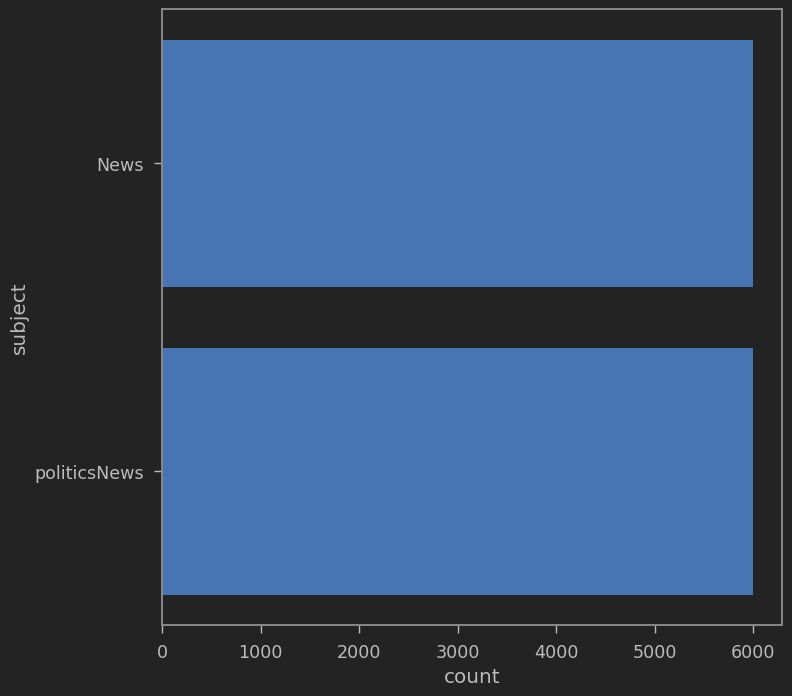

In [41]:
# plot the number of samples in 'subject'
plt.figure(figsize = (8, 8))
sns.countplot(y = "subject", data = df)

<Axes: xlabel='count', ylabel='isfake'>

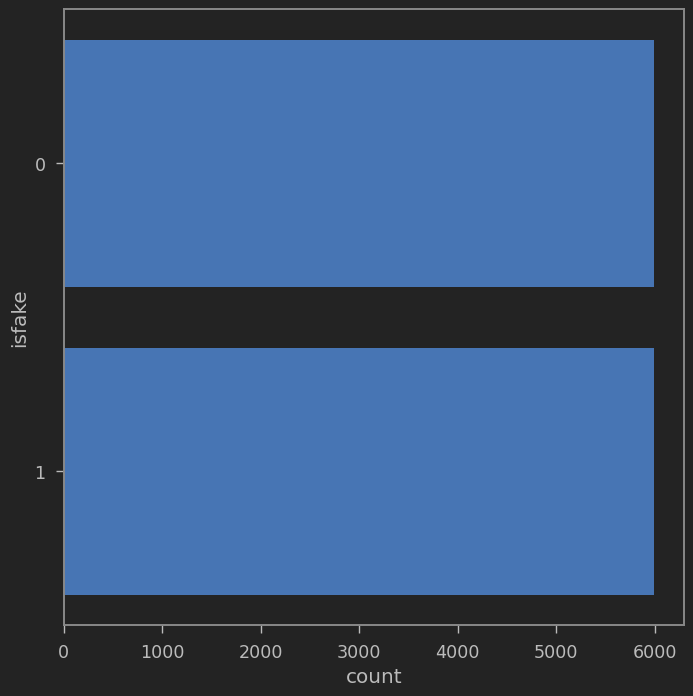

In [42]:
# plot the count plot for fake vs true news
plt.figure(figsize = (8, 8))
sns.countplot(y = "isfake", data = df)

In [43]:
# split data into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.clean_joined, df.isfake, test_size = 0.2)

In [44]:
from nltk import word_tokenize

In [45]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

In [46]:
print("The encoding for document\n",df.clean_joined[0],"\n is : ",train_sequences[0])

The encoding for document
 donald trump sends embarrassing year message disturbing donald trump wish americans happy year leave instead shout enemies haters dishonest fake news media reality star country rapidly grows stronger smarter want wish friends supporters enemies haters dishonest fake news media happy healthy year president angry pants tweeted great year america country rapidly grows stronger smarter want wish friends supporters enemies haters dishonest fake news media happy healthy year great year america donald trump realdonaldtrump december trump tweet went welll expect kind president sends year greeting like despicable petty infantile gibberish trump lack decency allow rise gutter long wish american citizens happy year bishop talbert swan talbertswan december likes calvin calvinstowell december impeachment great year america accept regaining control congress miranda yaver mirandayaver december hear talk include people hate wonder hate alan sandoval alansandoval december use

In [47]:
padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 40, truncating = 'post')

In [48]:
for i,doc in enumerate(padded_train[:2]):
     print("The padded encoding for document",i+1," is : ",doc)

The padded encoding for document 1  is :  [   7    4   57  888  848  951   16   10 1981 1082  427  992 1270  157
 4481 1828 5938  979  280 1614 9037  446  848  951  197    7    4   98
    2   93  848  951  240 7010 4089    2 1832  436   34 6214]
The padded encoding for document 2  is :  [    1   204   288  7134 10581    10     3     5     1   908   360   510
  7011    38  2028  4928    30 15912 14871  1027   224   635   767   629
    14  1083   108  2948     8    67    83  1602    24    10   290   151
  9605  5189   134   549]


In [49]:
# Sequential Model
model = Sequential()

# embeddidng layer
model.add(Embedding(total_words, output_dim = 128))

# Bi-Directional LSTM
model.add(Bidirectional(LSTM(128)))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         7240576   
                                                                 
 bidirectional (Bidirection  (None, 256)               263168    
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 7536769 (28.75 MB)
Trainable params: 7536769 (28.75 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
y_train = np.asarray(y_train)

In [51]:
total_words

56567

In [52]:
# train the model
model.fit(padded_train, y_train, batch_size = 32, validation_split = 0.1, epochs = 10)

Epoch 1/10
270/270 [==============================] - 69s 238ms/step - loss: 0.0805 - acc: 0.9611 - val_loss: 1.0802e-04 - val_acc: 1.0000
Epoch 2/10
270/270 [==============================] - 65s 242ms/step - loss: 0.0077 - acc: 0.9987 - val_loss: 0.0055 - val_acc: 0.9990
Epoch 3/10
270/270 [==============================] - 63s 233ms/step - loss: 3.5634e-04 - acc: 0.9999 - val_loss: 2.9573e-04 - val_acc: 1.0000
Epoch 4/10
270/270 [==============================] - 77s 287ms/step - loss: 1.7576e-05 - acc: 1.0000 - val_loss: 2.6008e-04 - val_acc: 1.0000
Epoch 5/10
270/270 [==============================] - 61s 227ms/step - loss: 9.0757e-06 - acc: 1.0000 - val_loss: 2.5036e-04 - val_acc: 1.0000
Epoch 6/10
270/270 [==============================] - 64s 236ms/step - loss: 5.5678e-06 - acc: 1.0000 - val_loss: 2.4936e-04 - val_acc: 1.0000
Epoch 7/10
270/270 [==============================] - 64s 239ms/step - loss: 3.7390e-06 - acc: 1.0000 - val_loss: 2.5207e-04 - val_acc: 1.0000
Epoch 8/10


In [53]:
pred = model.predict(padded_test)

75/75 [==============================] - 5s 60ms/step


In [54]:
# if the predicted value is >0.5 it is real else it is fake
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [55]:
# getting the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.9995831596498541


<Axes: >

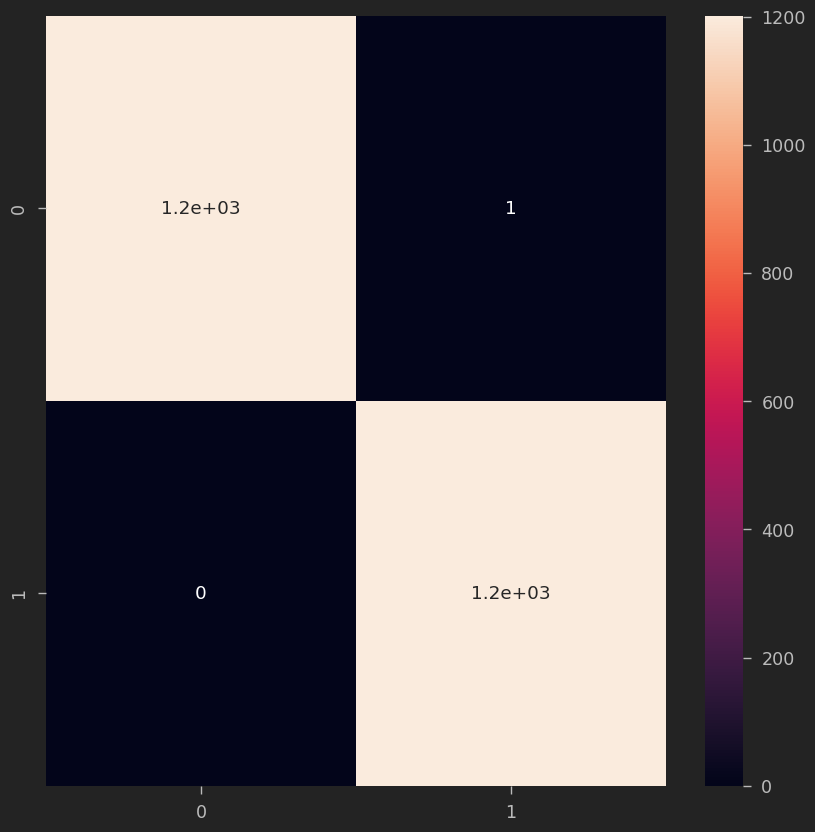

In [56]:
# get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True)

In [57]:
import nltk
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.sequence import pad_sequences

def preprocess_text(text):
    result = []
    for token in nltk.word_tokenize(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
    return " ".join(result)

def classify_news(input_text):
    category = {0: 'Fake News', 1: 'Real News'}
    preprocessed_text = preprocess_text(input_text)
    input_sequence = tokenizer.texts_to_sequences([preprocessed_text])
    padded_sequence = pad_sequences(input_sequence, maxlen=440, truncating='post', padding='post')
    prediction = model.predict(padded_sequence)
    if prediction[0][0] > 0.5:
        predicted_class = 1
    else:
        predicted_class = 0
    return category[predicted_class]

# Example usage:
input_text = "In the wake of yet another court decision that derailed Donald Trump s plan to bar Muslims from entering the United States, the New York Times published a report on Saturday morning detailing the president s frustration at not getting his way   and how far back that frustration goes.According to the article, back in June, Trump stomped into the Oval Office, furious about the state of the travel ban, which he thought would be implemented and fully in place by then. Instead, he fumed, visas had already been issued to immigrants at such a rate that his  friends were calling to say he looked like a fool  after making his broad pronouncements.It was then that Trump began reading from a document that a top advisor, noted white supremacist Stephen Miller, had handed him just before the meeting with his Cabinet. The page listed how many visas had been issued this year, and included 2,500 from Afghanistan (a country not on the travel ban), 15,000 from Haiti (also not included), and 40,000 from Nigeria (sensing a pattern yet?), and Trump expressed his dismay at each.According to witnesses in the room who spoke to the Times on condition of anonymity, and who were interviewed along with three dozen others for the article, Trump called out each country for its faults as he read: Afghanistan was a  terrorist haven,  the people of Nigeria would  never go back to their huts once they saw the glory of America, and immigrants from Haiti  all have AIDS. Despite the extensive research done by the newspaper, the White House of course denies that any such language was used.But given Trump s racist history and his advisor Stephen Miller s blatant white nationalism, it would be no surprise if a Freedom of Information Act request turned up that the document in question had the statements printed inline as commentary for the president to punctuate his anger with. It was Miller, after all, who was responsible for the  American Carnage  speech that Trump delivered at his inauguration.This racist is a menace to America, and he doesn t represent anything that this country stands for. Let s hope that more indictments from Robert Mueller are on their way as we speak.Featured image via Chris Kleponis/Pool/Getty Images"
predicted_label = classify_news(input_text)
print("Predicted Label:", predicted_label)


1/1 [==============================] - 1s 904ms/step
Predicted Label: Fake News
